Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [83]:
from cProfile import label
from dataclasses import field

# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace
from scipy.constants import degree
%matplotlib inline

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [84]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [85]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [86]:
from numpy import linalg
# Vaš kôd ovdje
w_1 = linalg.inv(fi.T @ fi) @ fi.T @ y
w_2 = linalg.pinv(fi) @ y
print(w_1)
print(w_2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

h: [2.2        2.65714286 3.11428571 4.02857143]
pogreška E: 2.042857142857143


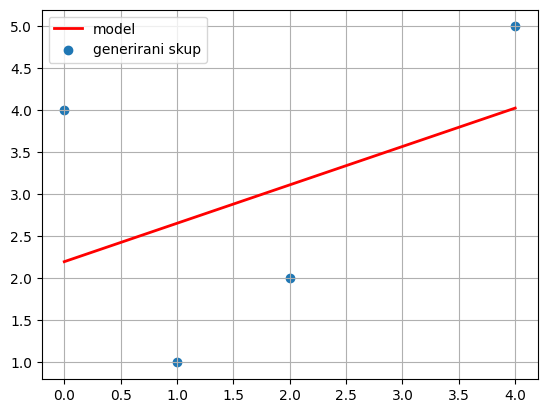

In [87]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = fi @ w_1
print(f"h: {h}")
E = mean_squared_error(y, h)
print(f"pogreška E: {E}")     

plt.plot(X, h, 'r', linewidth=2, label = 'model')
plt.scatter(X, y, label='generirani skup')
plt.legend()
plt.grid()
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [88]:
# Vaš kôd ovdje
try:
    linalg.inv(fi) @ y
except Exception as e:
    print("Izračun nije moguć")

Izračun nije moguć


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [89]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(fi, y)
coef = reg.coef_[1]
intercept = reg.intercept_
print(f"w:" , [intercept, coef])

h2 = reg.predict(fi)
E2 = mean_squared_error(y, h2)
print(f"Pogreška E: {E2}")

w: [2.2, 0.45714285714285713]
Pogreška E: 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [90]:
from numpy.random import normal

# Vaš kôd ovdje
f = lambda x: 5 + x - 2*x**2 - 5*x**3

def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, X.shape)

In [91]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [92]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

In [93]:
X.size, y.size

(50, 50)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

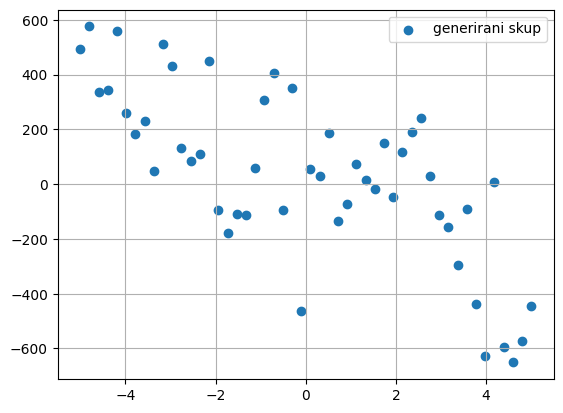

In [94]:
# Vaš kôd ovdje
plt.scatter(X, y, label='generirani skup')
plt.legend()
plt.grid()
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

pogreška: 35761.492286286724


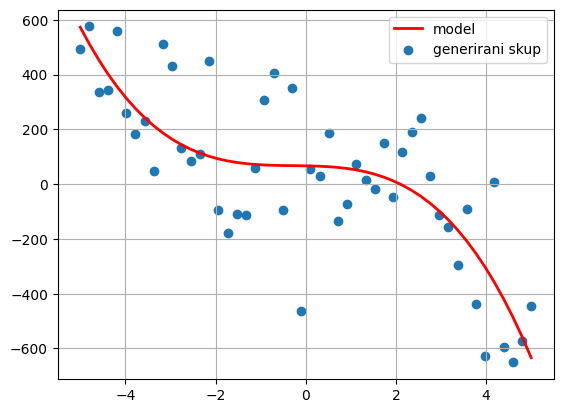

In [95]:
# Vaš kôd ovdje
fi_d3 = PolynomialFeatures(3).fit_transform(X)
w_d3 = linalg.pinv(fi_d3) @ y
h_d3 = fi_d3 @ w_d3

E3 = mean_squared_error(y, h_d3)
print(f"pogreška: {E3}")

plt.plot(X, h_d3, 'r', linewidth=2, label = 'model')
plt.scatter(X, y, label='generirani skup')
plt.legend()
plt.grid()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

pogreška za d = 1: 45555.31657408987
pogreška za d = 3: 35761.492286286724
pogreška za d = 5: 34676.6837685612
pogreška za d = 10: 32320.372904370157
pogreška za d = 20: 23812.248194033407


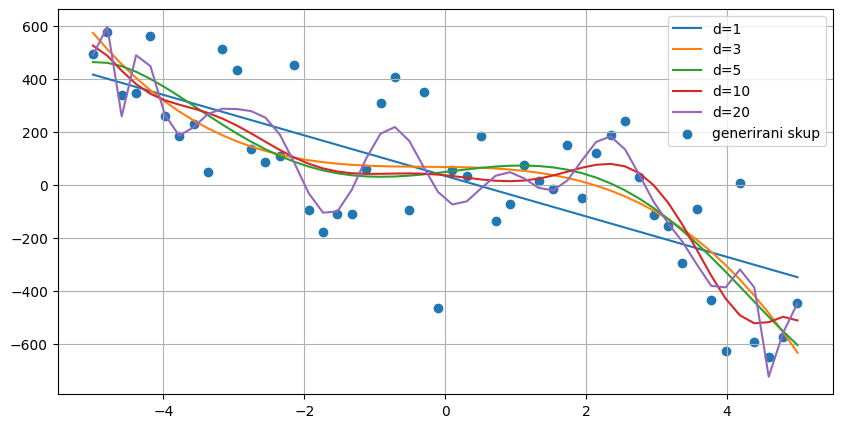

In [96]:
# Vaš kôd ovdje
fi_d = []
w_d = []
h_d = []
E_d = []
degrees = [1, 3, 5, 10, 20]

for d in degrees:
    fi_d.append(PolynomialFeatures(d).fit_transform(X))
    
for fi in fi_d:
    w_d.append(linalg.pinv(fi) @ y)
    h_d.append(fi @ w_d[-1])

plt.figure(figsize=(10, 5))
for i in range(len(h_d)):
    E_d.append(mean_squared_error(y, h_d[i]))
    plt.plot(X, h_d[i], label=f'd={degrees[i]}')
plt.scatter(X, y, label='generirani skup')
plt.grid()
plt.legend()

for i, deg in enumerate(degrees):
    print(f"pogreška za d = {deg}: {E_d[i]}")

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

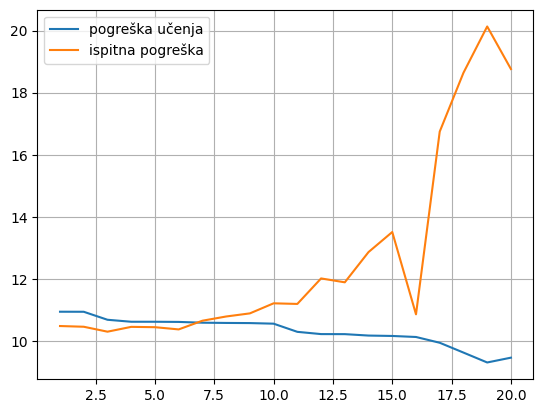

In [97]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train_3b, X_test_3b, y_train_3b, y_test_3b = train_test_split(X, y, test_size=0.5)
E_train = []
E_test = []
degrees = range(1, 21)

for d in degrees:
    fi_train = PolynomialFeatures(d).fit_transform(X_train_3b)
    fi_test = PolynomialFeatures(d).fit_transform(X_test_3b)
    w_train = linalg.pinv(fi_train) @ y_train_3b
    h_train = fi_train @ w_train
    h_test = fi_test @ w_train
    E_train.append(mean_squared_error(y_train_3b, h_train))
    E_test.append(mean_squared_error(y_test_3b, h_test))
    
plt.plot(degrees, np.log(E_train), label='pogreška učenja')
plt.plot(degrees, np.log(E_test), label='ispitna pogreška')
plt.legend()
plt.grid()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

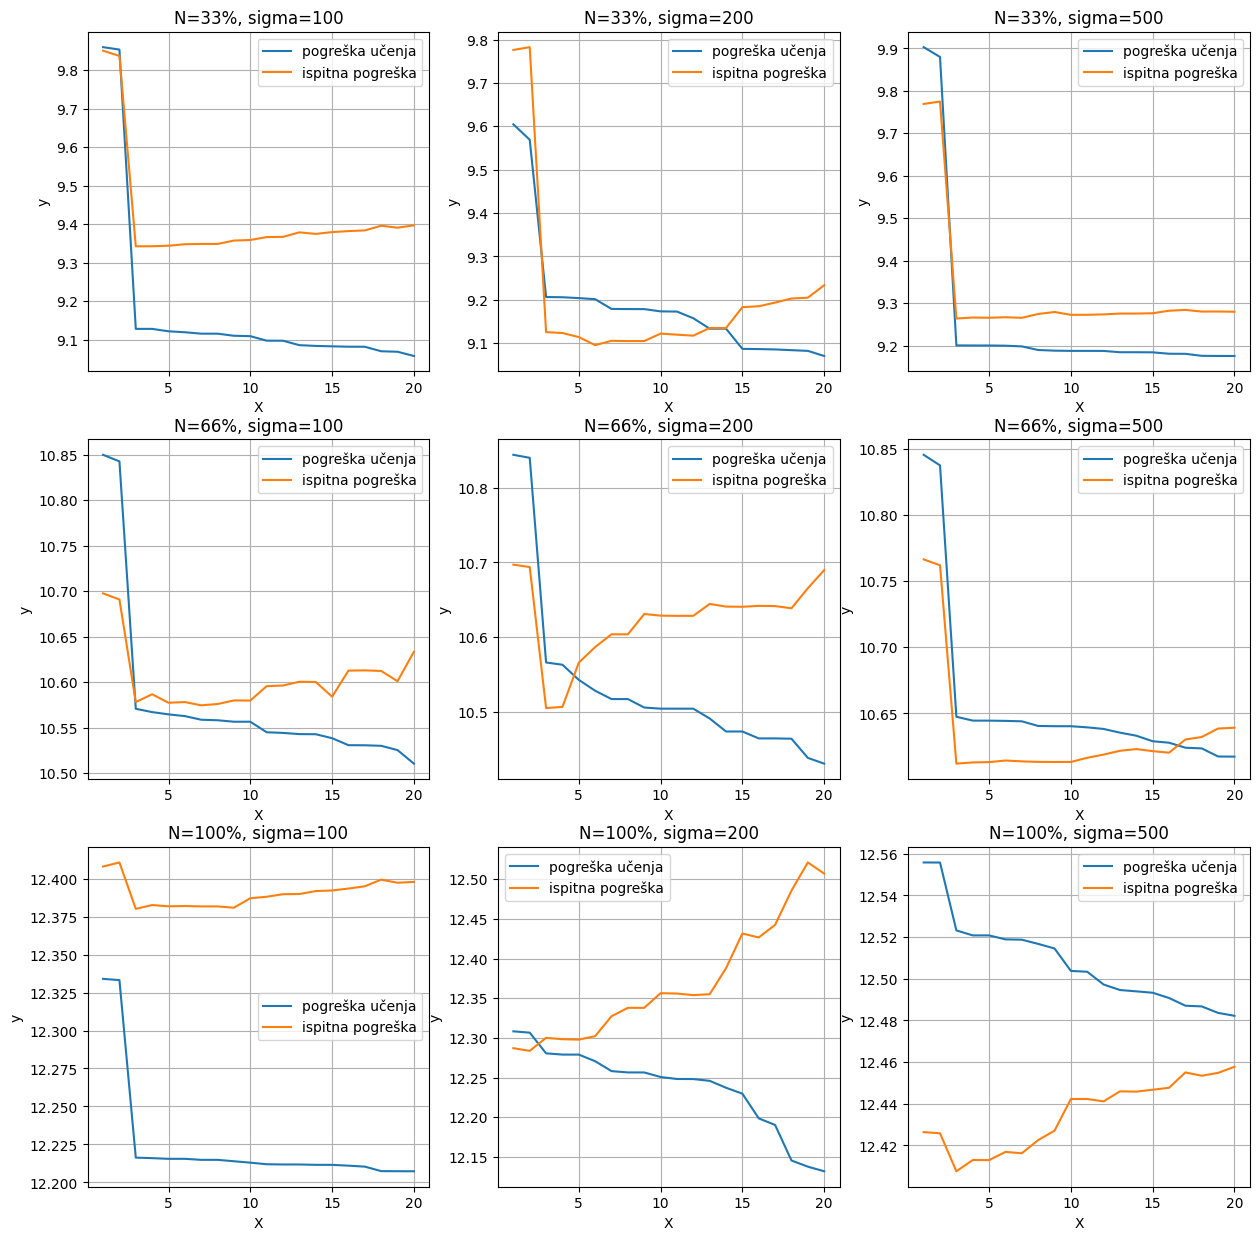

In [98]:
# Vaš kôd ovdje
N_3c = [1/3, 2/3, 1]
sigma_3c = [100, 200, 500]
X_3c = make_instances(-5, 5, 1000)
X_train_3c, X_test_3c = train_test_split(X_3c, test_size=0.5)
plt.figure(figsize=(15, 15))
for i in range(3):
    for j in range(3):
        X_train_3c_temp, _ = train_test_split(X_train_3c, test_size=N_3c[j])
        y_train_3c = make_labels(X_train_3c_temp, f, sigma_3c[i])
        X_test_3c_temp, _ = train_test_split(X_test_3c, test_size=N_3c[j])
        y_test_3c = make_labels(X_test_3c_temp, f, sigma_3c[i])
        E_train = []
        E_test = []
        for d in degrees:
            fi_train = PolynomialFeatures(d).fit_transform(X_train_3c_temp)
            fi_test = PolynomialFeatures(d).fit_transform(X_test_3c_temp)
            w_train = linalg.pinv(fi_train) @ y_train_3c
            h_train = fi_train @ w_train
            h_test = fi_test @ w_train
            E_train.append(mean_squared_error(y_train_3c, h_train))
            E_test.append(mean_squared_error(y_test_3c, h_test))
        plt.subplot(3, 3, i*3+j+1)
        plt.plot(degrees, np.log(E_train), label='pogreška učenja')
        plt.plot(degrees, np.log(E_test), label='ispitna pogreška')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f"N={int(N_3c[i]*100)}%, sigma={sigma_3c[j]}")
        plt.legend()
        plt.grid()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [99]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
fi_4a = PolynomialFeatures(3).fit_transform(X)

for lam in [0, 1, 10]:
    w_4a = linalg.inv(fi_4a.T @ fi_4a + lam * np.eye(4)) @ fi_4a.T @ y
    print(f"lambda {lam}: {w_4a}")
    print((fi_4a.T @ fi_4a + lam * np.eye(4)).shape)

lambda 0: [ 4.         -5.91666667  3.375      -0.45833333]
(4, 4)
lambda 1: [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
(4, 4)
lambda 10: [0.43312265 0.11060671 0.13827839 0.03093411]
(4, 4)


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [100]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for lam in [0, 1, 10]:
    reg = Ridge(alpha=lam).fit(fi_4a, y)
    coef = reg.coef_[1:]
    intercept = reg.intercept_
    print(f"lambda {lam}: {np.concatenate(([intercept], coef))}")

lambda 0: [ 4.         -5.91666667  3.375      -0.45833333]
lambda 1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda 10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

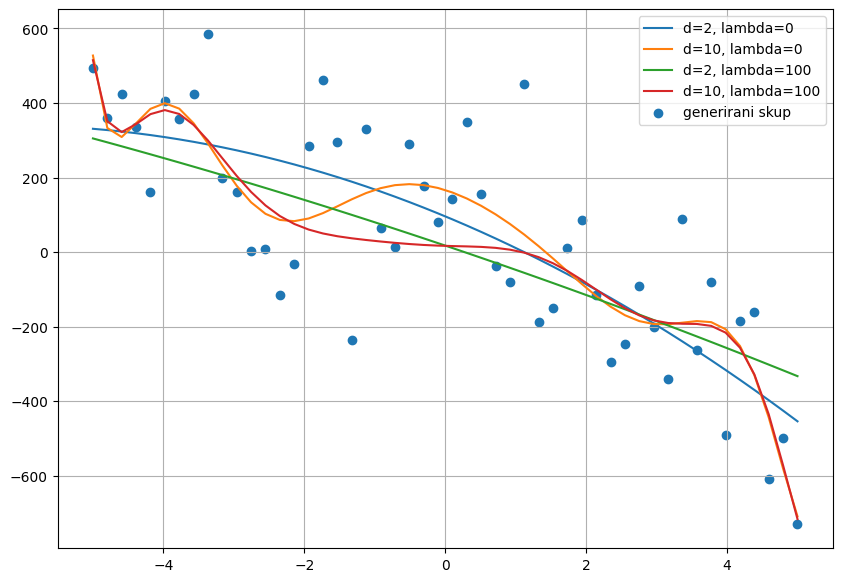

In [101]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
plt.figure(figsize=(10, 7))
for lam in [0, 100]:
    for deg in [2, 10]:
        fi = PolynomialFeatures(deg).fit_transform(X)
        w = linalg.inv(fi.T @ fi + lam * np.eye(deg + 1)) @ fi.T @ y
        h = fi @ w
        plt.plot(X, h, label=f'd={deg}, lambda={lam}')
plt.scatter(X, y, label='generirani skup')
plt.grid()
plt.legend()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


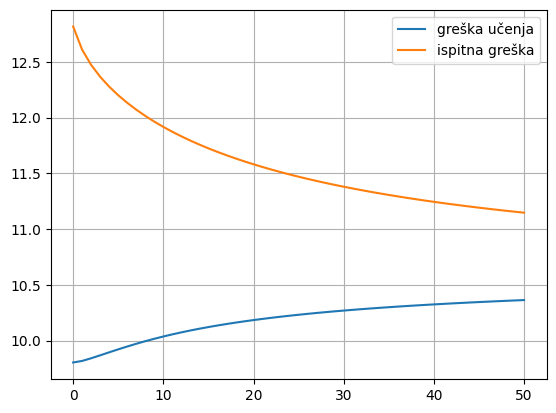

In [102]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
E_train = []
E_test = []
lambdas = range(51)

for lam in lambdas:
    fi_train = PolynomialFeatures(10).fit_transform(X_train)
    fi_test = PolynomialFeatures(10).fit_transform(X_test)
    w_train = linalg.inv(fi_train.T @ fi_train + lam * np.eye(10 + 1)) @ fi_train.T @ y_train
    h_train = fi_train @ w_train
    h_test = fi_test @ w_train
    E_train.append(mean_squared_error(y_train, h_train))
    E_test.append(mean_squared_error(y_test, h_test))
plt.grid()
plt.plot(lambdas, np.log(E_train), label='greška učenja')
plt.plot(lambdas, np.log(E_test), label='ispitna greška')
plt.legend()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [103]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

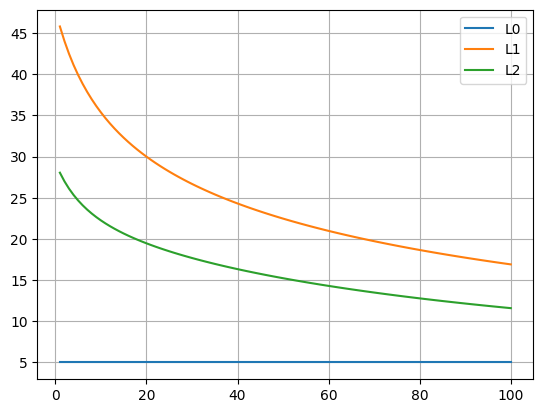

In [104]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
fi_train_5a = PolynomialFeatures(5).fit_transform(X_train_3b)
L0_norm = []
L1_norm = []
L2_norm = []

for lam in range(1, 101):
    reg = Ridge(alpha=lam).fit(fi_train_5a, y_train_3b)
    L0_norm.append(nonzeroes(reg.coef_.flatten()))
    L1_norm.append(np.sum(np.abs(reg.coef_)))
    L2_norm.append(np.linalg.norm(reg.coef_))
plt.grid()
plt.plot(range(1, 101), L0_norm, label='L0')
plt.plot(range(1, 101), L1_norm, label='L1')
plt.plot(range(1, 101), L2_norm, label='L2')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

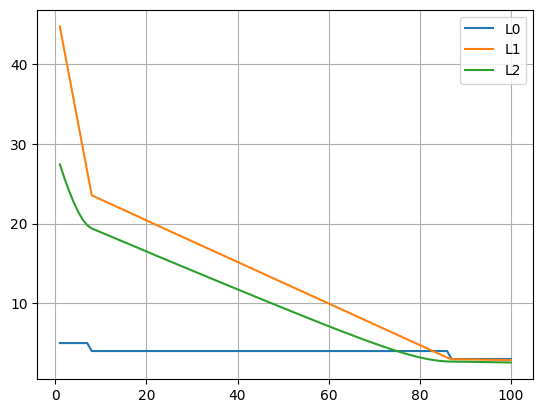

In [105]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
L0_norm = []
L1_norm = []
L2_norm = []

for lam in range(1, 101):
    reg = Lasso(alpha=lam).fit(fi_train_5a, y_train_3b)
    L0_norm.append(nonzeroes(reg.coef_))
    L1_norm.append(np.sum(np.abs(reg.coef_)))
    L2_norm.append(np.linalg.norm(reg.coef_))
plt.grid()
plt.plot(range(1, 101), L0_norm, label='L0')
plt.plot(range(1, 101), L1_norm, label='L1')
plt.plot(range(1, 101), L2_norm, label='L2')
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [106]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

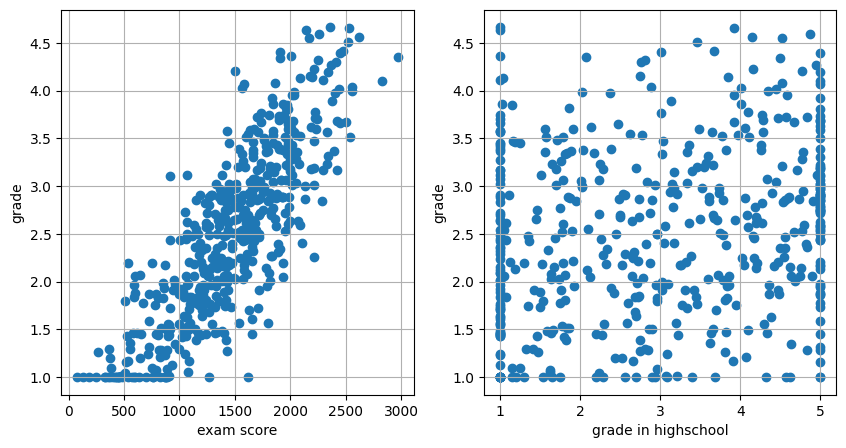

In [107]:
# Vaš kôd ovdje
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.scatter(grades_X[:,0], grades_y)
plt.xlabel('exam score')
plt.ylabel('grade')
plt.subplot(1, 2, 2)
plt.grid()
plt.scatter(grades_X[:,1], grades_y)
plt.xlabel('grade in highschool')
plt.ylabel('grade')
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [108]:
# Vaš kôd ovdje
grades_X_train, grades_X_test, grades_y_train, grades_y_test = train_test_split(grades_X, grades_y, test_size=0.5)
E_train = []
E_test = []

reg = Ridge(alpha=0.01).fit(grades_X_train, grades_y_train)
L0_norm = nonzeroes(reg.coef_)
L1_norm = np.sum(np.abs(reg.coef_))
L2_norm = np.linalg.norm(reg.coef_)

print(reg.coef_)

print(f"L0 norma: {L0_norm}")
print(f"L1 norma: {L1_norm}")
print(f"L2 norma: {L2_norm}")

[0.00137608 0.08127865]
L0 norma: 2
L1 norma: 0.08265472542908707
L2 norma: 0.08129029636048721


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [109]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1)).flatten()
grades_X_train_fixed, grades_X_test_fixed, grades_y_train_fixed, grades_y_test_fixed = train_test_split(grades_X_fixed, grades_y_fixed, test_size=0.5)

reg = Ridge(alpha=0.01).fit(grades_X_train_fixed, grades_y_train_fixed)
L0_norm_fixed = nonzeroes(reg.coef_)
L1_norm_fixed = np.sum(np.abs(reg.coef_))
L2_norm_fixed = np.linalg.norm(reg.coef_)

print(reg.coef_)

print(f"L0 norma: {L0_norm_fixed}")
print(f"L1 norma: {L1_norm_fixed}")
print(f"L2 norma: {L2_norm_fixed}")

[0.80739008 0.15221191]
L0 norma: 2
L1 norma: 0.9596019887587396
L2 norma: 0.8216125665597844


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [110]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:,1], axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [113]:
# Vaš kôd ovdje
grades_X_train_fixed_colinear, grades_X_test_fixed_colinear, grades_y_train_fixed, grades_y_test_fixed = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)

reg = Ridge(alpha=0.01).fit(grades_X_train_fixed_colinear, grades_y_train_fixed)
L0_norm_fixed_colinear = nonzeroes(reg.coef_)
L1_norm_fixed_colinear = np.sum(np.abs(reg.coef_))
L2_norm_fixed_colinear = np.linalg.norm(reg.coef_)

print(reg.coef_)

print(f"L0 norma: {L0_norm_fixed_colinear}")
print(f"L1 norma: {L1_norm_fixed_colinear}")
print(f"L2 norma: {L2_norm_fixed_colinear}")

[0.79735626 0.08013669 0.08013669]
L0 norma: 3
L1 norma: 0.9576296357011879
L2 norma: 0.8053699640105083


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [165]:
# Vaš kôd ovdje
w1_1 = []
w1_2 = []
w1_3 = []
w2_1 = []
w2_2 = []
w2_3 = []

for i in range(10):
    grades_X_train_fixed_colinear, grades_X_test_fixed_colinear, grades_y_train_fixed, grades_y_test_fixed = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    reg1 = Ridge(alpha=0.01).fit(grades_X_train_fixed_colinear, grades_y_train_fixed)
    reg2 = Ridge(alpha=1000).fit(grades_X_train_fixed_colinear, grades_y_train_fixed)
    w1_1.append(reg1.coef_[0])
    w1_2.append(reg1.coef_[1])
    w1_3.append(reg1.coef_[2])
    w2_1.append(reg2.coef_[0])
    w2_2.append(reg2.coef_[1])
    w2_3.append(reg2.coef_[2])
    
    print(f"iteration {i}: w1 = {reg1.coef_}")
    print(f"iteration {i}: w2 = {reg2.coef_}")
    print()
    
print(f"std w1_1 = {np.std(w1_1)}")
print(f"std w1_2 = {np.std(w1_2)}")
print(f"std w1_3 = {np.std(w1_3)}")
print(f"std w2_1 = {np.std(w2_1)}")
print(f"std w2_2 = {np.std(w2_2)}")
print(f"std w2_3 = {np.std(w2_3)}")

iteration 0: w1 = [0.83265053 0.07483515 0.07483515]
iteration 0: w2 = [0.16579999 0.03405283 0.03405283]

iteration 1: w1 = [0.79735626 0.08013669 0.08013669]
iteration 1: w2 = [0.15703356 0.02664742 0.02664742]

iteration 2: w1 = [0.81845427 0.04525193 0.04525193]
iteration 2: w2 = [0.17833349 0.03188297 0.03188297]

iteration 3: w1 = [0.80086373 0.0614553  0.0614553 ]
iteration 3: w2 = [0.15563723 0.022474   0.022474  ]

iteration 4: w1 = [0.81216485 0.06648337 0.06648337]
iteration 4: w2 = [0.16174675 0.03077003 0.03077003]

iteration 5: w1 = [0.81501911 0.04444567 0.04444567]
iteration 5: w2 = [0.16591703 0.01772788 0.01772788]

iteration 6: w1 = [0.81925961 0.07443972 0.07443972]
iteration 6: w2 = [0.16617211 0.03087282 0.03087282]

iteration 7: w1 = [0.79812791 0.0446305  0.0446305 ]
iteration 7: w2 = [0.16404384 0.02835895 0.02835895]

iteration 8: w1 = [0.8617778  0.08643588 0.08643588]
iteration 8: w2 = [0.16558664 0.03291219 0.03291219]

iteration 9: w1 = [0.827048   0.07280

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.